In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data1 = pd.read_csv('House Price India.csv')
data=data1.copy()

In [3]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
data.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [5]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [6]:
data=pd.DataFrame(data)
data=data.drop(['id','Date','waterfront present','number of views','condition of the house','grade of the house',
               'Renovation Year', 'Postal Code', 'Lattitude','Longitude','living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport'],axis=1)

In [7]:
data.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'Area of the house(excluding basement)',
       'Area of the basement', 'Built Year', 'Price'],
      dtype='object')

In [8]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [9]:
y

0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: Price, Length: 14620, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
multi_regressor = LinearRegression()
multi_regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred1=multi_regressor.predict(x_test)

In [13]:
y_pred1

array([290503.87782266, 476475.95327925, 444243.41865235, ...,
       931312.71082971, 333761.34469041, 581499.90578116])

In [15]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred1))

0.5732539926624096


In [16]:
data.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'Area of the house(excluding basement)',
       'Area of the basement', 'Built Year', 'Price'],
      dtype='object')

In [26]:
new_data=pd.DataFrame({
    'number of bedrooms':3,
    'number of bathrooms':1,
    'living area':4000,
    'lot area':9080,
    'number of floors':1,
    'Area of the house(excluding basement)':1556,
    'Area of the basement':0,
    'Built Year':2000,
},index=[0])

In [27]:
multi_regressor = LinearRegression()
multi_regressor.fit(x, y)

LinearRegression()

In [28]:
predicted_price = multi_regressor.predict(new_data)

In [29]:
print(predicted_price)

[696726.29335131]


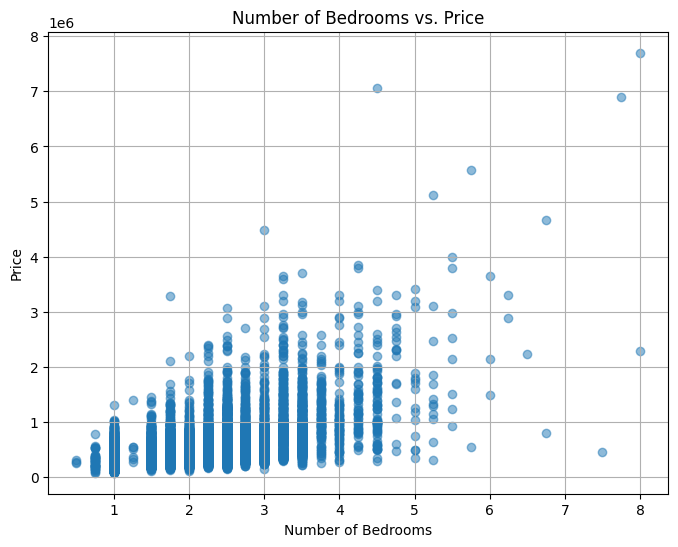

In [35]:
import matplotlib.pyplot as plt
x = data['number of bathrooms']
y = data['Price']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Axes: xlabel='number of bathrooms', ylabel='count'>

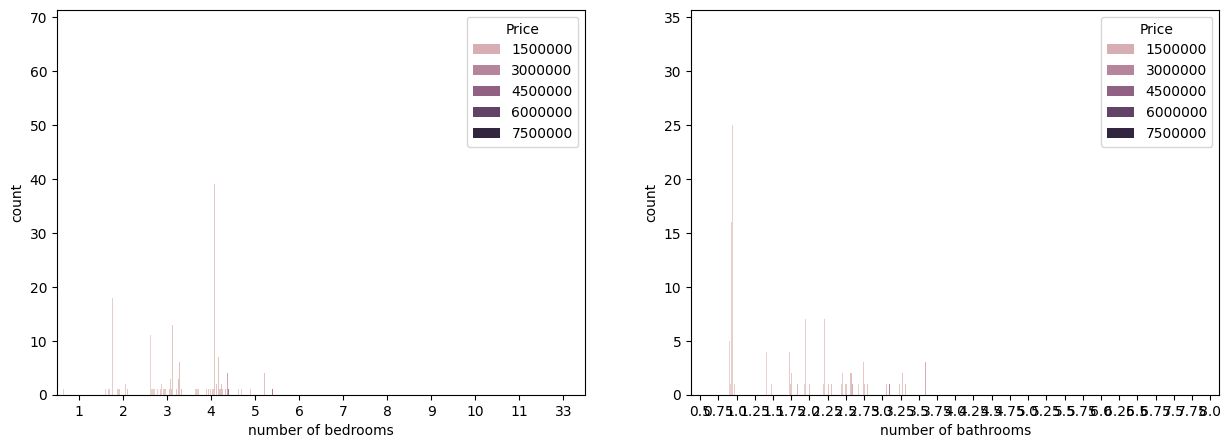

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='number of bedrooms',hue='Price',data=data1)
plt.subplot(1,2,2)
sns.countplot(x='number of bathrooms',hue='Price',data=data1)